# Final Background

## Title

Analysis of China's Population.

## Problem

The impact of changes in China's one-child policy on China's population and gender ratios.

## Background

Around the 1960s, China saw a huge leap in population due to low death rates and a spike in birth rates. With concern for the growth in population, policymakers instituted the one-child policy in 1980s. This policy restricted families to only birth one child and heavily fined those that raised more than one. Other enforcement methods included mandatory sterilization, forced abortions, and governmental pushes for contraceptives [1,3]. 

As of recent times, China sits at around 1.4 billion people as the number one most populous country [2]. The growth of the population seems to have died down thus far, and policymakers have relaxed the one-child policy in 2013 and proceeded to abolish it in 2016. Now China is allowing for each family to have two children [1]. Though the policy has ended, lasting effects can be seen in the population. Today, China is facing issues with an incredibly high male to female ratio [7]. The one-child policy may have expounded this issue. Due to the preference for male laborers in rural areas, and the limit on children, many rural families likely prefer for their one child to be male. There have been a number of cases of voluntary sex-selective abortions in rural areas, where fetuses are aborted after being determined female [6,7]. I would like to explore if there is a connection between changes in the policy and changes in gender ratios and number of sex-selective abortions across the years. 

Other changes in population have also been identified, such as an aging population and a greater number of old individuals [1,5]. I would also like to examine other aspects of China's population over time and find out if any other changes may be linked to alterations in the one-child policy.


## Questions and Justification

**Has China's population growth slowed in recent years and how might it be projected to grow?**

- China still faces many issues of overpopulation. Cities are crowded and the population is putting a strain on natural resources. Overpoplulation has contributed to growing water and air pollution as well [4]. Analyzing how the population is proceeding is important in determining whether the growth is sustainable.

**Were there any differences in the population / population growth before and after the repeal of the one-child policy?**
    
- As the one-child policy was such a long-lasting and widely enforced policy, I hypothesis that there would at least be some lasting effects. Exploring this question may give insight on how the policy has effected the population. Would be good to examine population by age as well.

**What does the gender ratio and mortality rate at birth by gender in china look like across the years and does the one-child policy seem to have an effect?**

- China currently has a higher male to female ratio and there has been evidence of sex-selective abortions in rural areas [6,7]. Examining how this has changed over time may reveal what factors effect the issue. 

## Datasets:

- [Population and other data for China across years](https://data.worldbank.org/country/china?view=chart)
    - Data on population, life expectancy, climate change, and more for China from 1960-2019. 
- [Gender ratio data](https://ourworldindata.org/gender-ratio)
    - Information about sex ratios, birth and mortality rates by sex, life expectancy by sex, and more for all countries across 1962-2017.
- [Minimum set of gender indicators](https://genderstats.un.org/#/downloads)
    - Data on child mortality rates, employment, education, and etc by sex for all countries 1990-2020.

## Concerns and Considerations

If it is found that the population is no longer growing at a alarming rate, people may deem this as a success of the one-child policy. We should be careful to not ignore the negative consequences of such an impactful policy. Vice-versa, if female birth mortality is found to have increased under the policy, we should also be wary of jumping to overly demonizing the government and/or policy. Effects of policies are hard to predict, and reasons behind sex-selective abortions stretch beyond more than just one policy.

There are some concerns in attributing too much of the change in population to changes in the one-child policy. I would like to see if some of the changes line up with the timeline of changes to the policy, but this does not mean the policy is the sole or even main cause of population changes. We should keep in mind that other things, like economic and cultural changes, may have an effect on birth rates and gender ratios in China. Changes in policy may also be partly reactionary to changes in population too, so that is another thing to keep in mind.

## Sources

1. “One-Child Policy.” Wikipedia, Wikimedia Foundation, 30 Apr. 2021, https://en.wikipedia.org/wiki/One-child_policy.
2. “People's Republic of China.” Data Commons, Data Commons, https://datacommons.org/place/country/CHN.
3. Fensom, Anthony. “Dangerous Demographics: China's Population Problem Will Eclipse Its Ambitions.” The National Interest, The Center for the National Interest, 16 Sept. 2019, https://nationalinterest.org/feature/dangerous-demographics-chinas-population-problem-will-eclipse-its-ambitions-80961
4. G, Qu, and Li J. “An Outline of Study on China's Population / Environment Issues.” China Population Newsletter, U.S. National Library of Medicine, https://pubmed.ncbi.nlm.nih.gov/12286553/.
5. Wang, Feng, and Eswar Prasad. “China's Population Destiny: The Looming Crisis.” Brookings, Brookings, 28 July 2016, www.brookings.edu/articles/chinas-population-destiny-the-looming-crisis/.
6. Pandey, Kiran. “Selective Abortions Killed 22.5 Million Female Foetuses in China, India.” Down To Earth, https://www.downtoearth.org.in/news/health/selective-abortions-killed-22-5-million-female-foetuses-in-china-india-64043.
7. Zhu, W. X., et al. “China's Excess Males, Sex Selective Abortion, and One Child Policy: Analysis of Data from 2005 National Intercensus Survey.” BMJ, vol. 338, no. apr09 2, 2009, doi:10.1136/bmj.b1211, https://www.researchgate.net/publication/24270887_China's_excess_males_sex_selective_abortion_and_one_child_policy_Analysis_of_data_from_2005_national_intercensus_survey



In [272]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np

from scipy import stats as scipystats
#import statsmodels.api
#from statsmodels import stats as smstats

from sklearn.linear_model import LinearRegression

sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("ticks")

countries = ["China", "India", "United States"]

In [238]:
popTotal = pd.read_csv('data/PopulationTotal_All.csv',sep='\t',skiprows=4)
popTotal = popTotal.drop(columns=["Indicator Name", "Indicator Code"]).copy()
popTotal = pd.melt(popTotal, id_vars=["Country Name", "Country Code"], var_name='Year', value_name="Population Total").copy()
popTotal["Year"] = popTotal["Year"].astype(int).copy()
popTotal[popTotal["Population Total"].isna()]

chinaTotal = popTotal[popTotal["Country Name"] == "China"].sort_values("Year")
chinaTotal.head(10)

,Country Name,Country Code,Year,Population Total
38,China,CHN,1960,667070000.0
302,China,CHN,1961,660330000.0
566,China,CHN,1962,665770000.0
830,China,CHN,1963,682335000.0
1094,China,CHN,1964,698355000.0
1358,China,CHN,1965,715185000.0
1622,China,CHN,1966,735400000.0
1886,China,CHN,1967,754550000.0
2150,China,CHN,1968,774510000.0
2414,China,CHN,1969,796025000.0


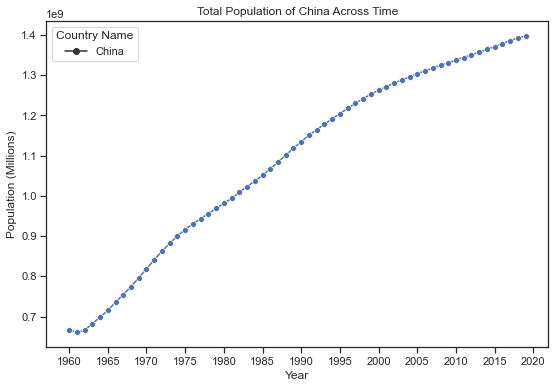

In [24]:
fig, ax = plt.subplots()
chinaTotalPlot = sns.lineplot(x = 'Year',
                        y = 'Population Total',
                        data = chinaTotal,
                        style = 'Country Name', 
                        markers = True,
                        dashes = False,
                        markersize = 6
)
"""for ind, label in enumerate(chinaTotalPlot.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        
"""                     

#plt.locator_params(axis='x', nbins=10)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
chinaTotalPlot.set(xlabel='Year', ylabel="Population (Millions)", title="Total Population of China Across Time")
#plt.ylim(0)

plt.show()

## Comparing China's pop to other countries
* Choosing the top 3 most populous countries right now, so the line graph doesn't get too cluttered
* India also has some overpopulation issues
    * Apparently some states have implemented a two-child policy, but it's not as prevalent or as cracked down on as China
    * Interesting to compare
* Though U.S. is 3rd most populus, it's like 1/3 the size of China and India's pop

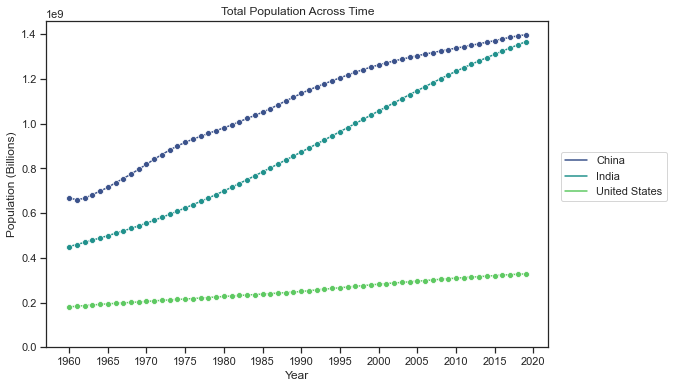

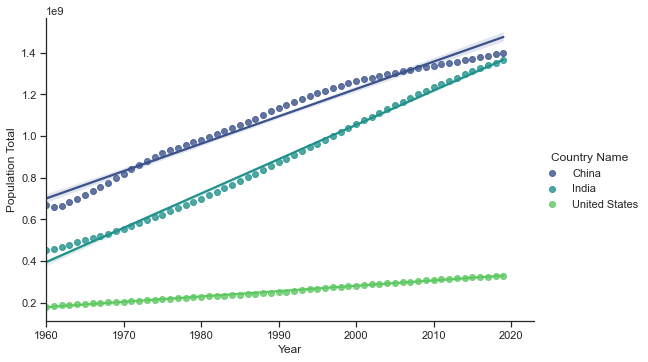

In [25]:
fig, ax = plt.subplots()


df = popTotal[popTotal['Country Name'].isin(countries)]
df_plot = sns.lineplot(x = 'Year',
                        y = 'Population Total',
                        data = df,
                        hue = 'Country Name',
                        marker = 'o',
                        markers = True,
                        dashes = False,
                        markersize = 6,
                        hue_order = countries, 
                        palette = 'viridis'
                      )


ax.xaxis.set_major_locator(plt.MultipleLocator(5))
df_plot.set(xlabel='Year', ylabel="Population (Billions)", title="Total Population Across Time")
plt.legend(bbox_to_anchor=(1.025, .6), loc=2, borderaxespad=0)
plt.ylim(0)
plt.show()

#seaborn doesn't let you get slope and intercept for reg??
sns.lmplot(x="Year", y="Population Total", data=df, hue="Country Name", palette = 'viridis', hue_order = countries, aspect = 1.5);

## ML regression lines

China
R^2: 0.9749416187485966
Slope: 13142568.769102529
Intercept: -25059270899.462814

India
R^2: 0.9956201264767867
Slope: 16474505.296415677
Intercept: -31895441569.81899

United States
R^2: 0.9963453743349272
Slope: 2567184.157460406
Intercept: -4853639109.717478



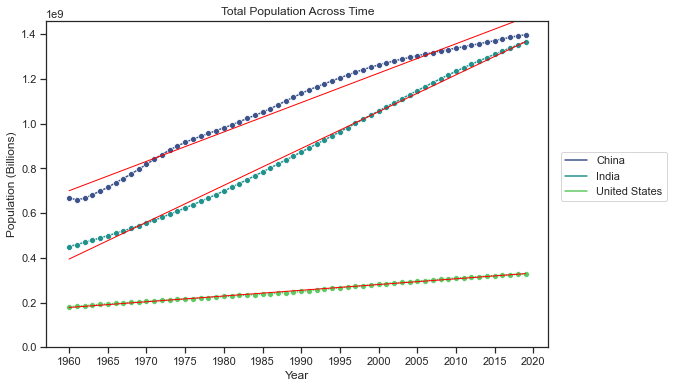

In [155]:
def linReg(name, yearMin, yearMax):
    model=LinearRegression(fit_intercept=True)
    df = popTotal[ (popTotal["Year"] >= yearMin) & (popTotal["Year"] <= yearMax)] 
    df = df[df["Country Name"] == name]
    x = df[["Year"]]
    y = df[["Population Total"]]
    model.fit(x, y)
    score = model.score(x, y)
    slope = model.coef_[0][0]
    intercept = model.intercept_[0]
    return (slope, intercept, score)

fig, ax = plt.subplots()
df = popTotal[popTotal['Country Name'].isin(countries)]
df_plot = sns.lineplot(x = 'Year',
                        y = 'Population Total',
                        data = df,
                        hue = 'Country Name',
                        marker = 'o',
                        markers = True,
                        dashes = False,
                        markersize = 6,
                        hue_order = countries, 
                        palette = 'viridis'
                      )

ax.xaxis.set_major_locator(plt.MultipleLocator(5))
df_plot.set(xlabel='Year', ylabel="Population (Billions)", title="Total Population Across Time")
plt.legend(bbox_to_anchor=(1.025, .6), loc=2, borderaxespad=0)
plt.ylim(0)


for country in countries:
    slope,intercept,score = linReg(country, 1960, 2019)
    print(country + "\nR^2: " + str(score) + "\nSlope: "+ str(slope) + "\nIntercept: "+ str(intercept) + "\n")
    xfit = np.linspace(1960,2019,100) # returns every split 100 nums from 0 to 10
    yfit = slope * xfit + intercept
    plt.plot(xfit,yfit, color="red", zorder=2, linewidth=1)

plt.show()

* Other countries tend to have a more linear population growth
* China's population fluctuates much more than the others
* May be the change in policy effecting population

China 1960-1980s
R^2: 0.9904327799144284
Slope: 17834863.636363633
Intercept: -34318004696.969692

China 1980-2013
R^2: 0.9738445910350151
Slope: 11676994.652406415
Intercept: -22112760705.882347

China 2013-2019
R^2: 0.9985348730094373
Slope: 6999733.082706769
Intercept: -12732522879.699253



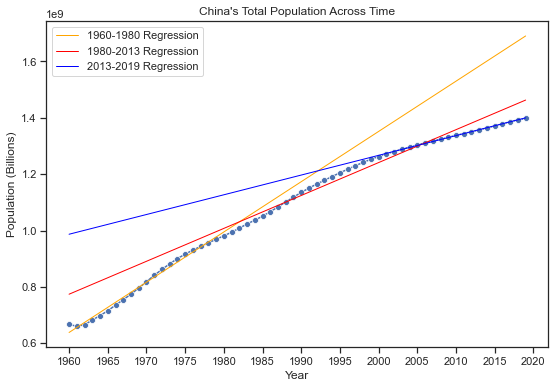

In [156]:
fig, ax = plt.subplots()
chinaTotalPlot = sns.lineplot(x = 'Year',
                        y = 'Population Total',
                        data = chinaTotal,
                        marker = 'o',
                        markers = True,
                        dashes = False,
                        markersize = 6,
                        palette = "Greys"
)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
chinaTotalPlot.set(xlabel='Year', ylabel="Population (Billions)", title="China's Total Population Across Time")
#plt.ylim(0)

slope,intercept,score = linReg("China", 1960, 1980)
print("China 1960-1980s" + "\nR^2: " + str(score) + "\nSlope: "+ str(slope) + "\nIntercept: "+ str(intercept) + "\n")
xfit = np.linspace(1960,2019,100)
yfit = slope * xfit + intercept
plt.plot(xfit, yfit, color="orange", zorder=2, linewidth=1, label="1960-1980 Regression")

slope,intercept,score = linReg("China", 1980, 2013)
print("China 1980-2013" + "\nR^2: " + str(score) + "\nSlope: "+ str(slope) + "\nIntercept: "+ str(intercept) + "\n")
xfit = np.linspace(1960,2019,100)
yfit = slope * xfit + intercept
plt.plot(xfit,yfit, color="red", zorder=2, linewidth=1,  label="1980-2013 Regression")

slope,intercept,score = linReg("China", 2000, 2019)
print("China 2013-2019" + "\nR^2: " + str(score) + "\nSlope: "+ str(slope) + "\nIntercept: "+ str(intercept) + "\n")
xfit = np.linspace(1960,2019,100)
yfit = slope * xfit + intercept
plt.plot(xfit,yfit, color="blue", zorder=2, linewidth=1, label="2013-2019 Regression")

plt.legend()
#plt.legend(bbox_to_anchor=(1.025, .6), loc=2, borderaxespad=0)
plt.show()

* From 1960 - 1980 when there was no restrictive policies, we have the greatest slope / projected growth
* After 1980, the slope gets quite a bit lower and growth seems to die down
* Surprisingly after 2013 when restrictions were loosened, project population growth is even lower than before
* Has not seemed to bounce up yet after seven years
    * Seemed to achieve the goal of reducing population growth
    * But is that necessarily all that good for the future if the aging population has fewer young people to support them?

## Population growth

In [237]:
popGrowth = pd.read_csv('data/PopulationGrowth_All.csv',sep=',',skiprows=4)
popGrowth = popGrowth.drop(columns=["Indicator Name", "Indicator Code", "Unnamed: 65"]).copy()
popGrowth = pd.melt(popGrowth, id_vars=["Country Name", "Country Code"], var_name='Year', value_name="Population Growth").copy()
popGrowth["Year"]= popGrowth["Year"].astype(int).copy()

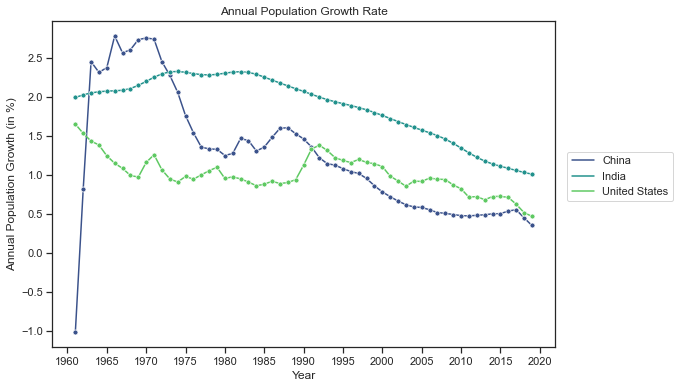

In [203]:

fig, ax = plt.subplots()
chinaGrowthPlot = sns.lineplot(x = 'Year',
                        y = 'Population Growth',
                        data = popGrowth[popGrowth["Country Name"].isin(countries)],
                        hue = 'Country Name', 
                        hue_order = countries, 
                        markers = True,
                        dashes = False,
                        markersize = 5,
                        marker = "o",
                        palette = "viridis"
)                  

#plt.locator_params(axis='x', nbins=10)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
chinaGrowthPlot.set(xlabel='Year', ylabel="Annual Population Growth (in %)", title="Annual Population Growth Rate")
plt.legend(bbox_to_anchor=(1.025, .6), loc=2, borderaxespad=0)
#plt.ylim(0)

plt.show()

* Basically each point tells what percent the population grew by last year
    * So if there was 1000 people last year and 1100 people this year, growth rate is 100/1000 = 10% 
* Human population alltogether in the last few years has slowed annual % growth
    * Which makes sense because the population is not going to keep growing exponentially
    * like every year it's 1.02 of the previous
* not sure how useful this information is in comparision
    * China seems to have started off with a high growth rate and it took a drastic dive between 1975 and 1980
    * Which is surprising since you'd think it'd take a more drastic dip after the policy implementation in 1980?
    * What happened between 1975 and 1980?? 
    * Upon googling it, might have been the Northern Chinese Famine of 1876–1879
    * Apparently crops wouldn't grow and 9 - 13 million people died, can see how that can majorly limit population growth 
* China seems to be in the ball-park of the same growth rate as the U.S. now
    * Which that's better, but they're still gaining more people every year due to the sheer size of their pop, and taking a percentage off that is large
    

In [356]:
# Data is how many males births per every 100 female births
sexRatio = pd.read_csv('data/sex-ratio-at-birth.csv',sep=',',skiprows=0) 
sexRatio = sexRatio.rename(columns={'Sex ratio at birth (male births per female births)':'Sex Ratio', 'Entity' : 'Country Name', 'Code':'Country Code'})

# divide by 100 to get 1:1 ratio
sexRatio['Sex Ratio'] = sexRatio['Sex Ratio'].div(100)
sexRatio

,Country Name,Country Code,Year,Sex Ratio
0,Afghanistan,AFG,1962,1.06
1,Afghanistan,AFG,1967,1.06
2,Afghanistan,AFG,1972,1.06
3,Afghanistan,AFG,1977,1.06
4,Afghanistan,AFG,1982,1.06
...,...,...,...,...
4977,Zimbabwe,ZWE,2013,1.02
4978,Zimbabwe,ZWE,2014,1.02
4979,Zimbabwe,ZWE,2015,1.02
4980,Zimbabwe,ZWE,2016,1.02


(1.0, 1.18)

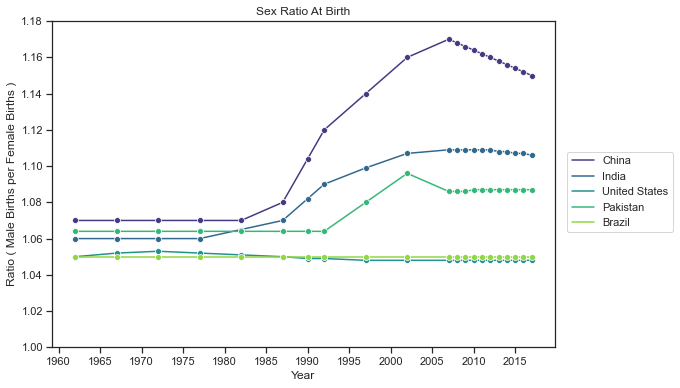

In [358]:
countries2 = ["China", "India", "United States" , "Pakistan", "Brazil"]

fig, ax = plt.subplots()
chinaRatioPlot = sns.lineplot(
                        x = 'Year',
                        y = 'Sex Ratio',
                        data = sexRatio[sexRatio['Country Name'].isin(countries2)],
                        hue = 'Country Name', 
                        hue_order = countries2, 
                        marker = 'o',
                        markers = True,
                        dashes = False,
                        markersize = 6,
                        palette = "viridis"
)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
chinaRatioPlot.set(xlabel='Year', ylabel="Ratio ( Male Births per Female Births )", title="Sex Ratio At Birth")
plt.legend(bbox_to_anchor=(1.025, .6), loc=2, borderaxespad=0)
plt.ylim(1,1.18)

* Pretty big leapt in ratio compared to other largely populated countries, at about 1985
* Looking at Pakistan, Brazil and more countries, they mostly stable out the ratio in the last few years
    * See an actual decrease in the ratio for China in the later years

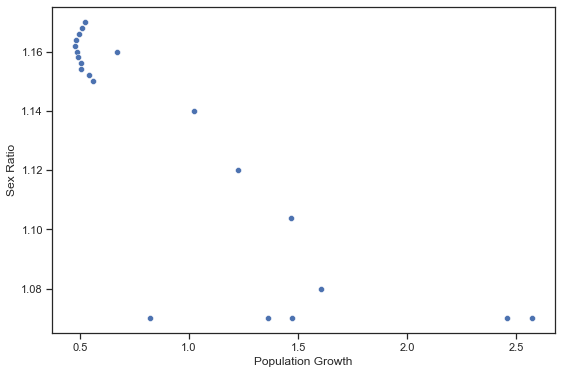

Correlation Coeff:  -0.8406269636143416
P-Value:  0.0000018371


In [360]:
chinaRatio = sexRatio.loc[sexRatio['Country Name'] == 'China'].sort_values("Year").copy()
temp = popGrowth[ (popGrowth["Country Name"] == "China") & popGrowth["Year"].isin(chinaRatio["Year"]) ].sort_values("Year")["Population Growth"].copy()
chinaRatio["Population Growth"] = temp.values
chinaRatio.head(20)

sns.scatterplot(data=chinaRatio, y="Sex Ratio", x="Population Growth")
corr, pval = scipystats.pearsonr(chinaRatio['Population Growth'], chinaRatio['Sex Ratio'])
plt.show()
print("Correlation Coeff: ", corr)
print("P-Value: ", '{:0.10f}'.format(pval))

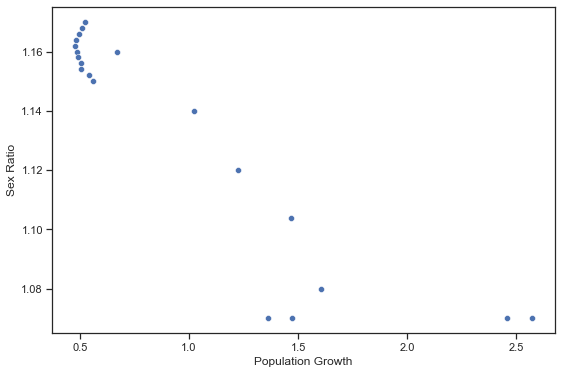

Correlation Coeff:  -0.912047118244702
P-Value:  0.0000000217


In [361]:
chinaRatio = chinaRatio[chinaRatio["Year"] != 1962] # first year, pop growth is really out there

sns.scatterplot(data=chinaRatio, y="Sex Ratio", x="Population Growth")
plt.show()
corr, pval = scipystats.pearsonr(chinaRatio['Population Growth'], chinaRatio['Sex Ratio'])
print("Correlation Coeff: ", corr)
print("P-Value: ", '{:0.10f}'.format(pval))

* Seems to be an outlier for the first year. 
    * Decrease in population / negative pop growth that year
    * Not sure if may be hiccup in data collection because it's right when this data starts - 1960s
    * Was afraid the outlier skewed in a way that made data appear more correlated, but no
    * P-val low, does seem to be correlated 

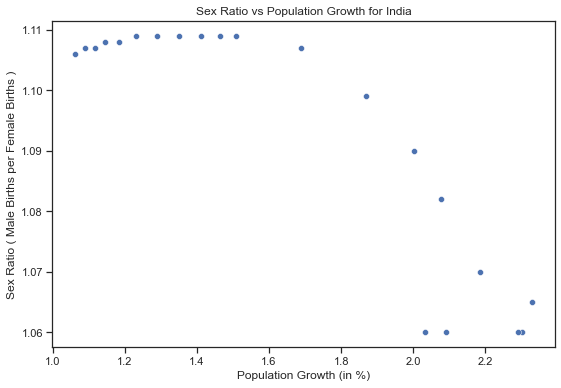

Correlation Coeff:  -0.8894418921581125
P-Value:  0.0000000695


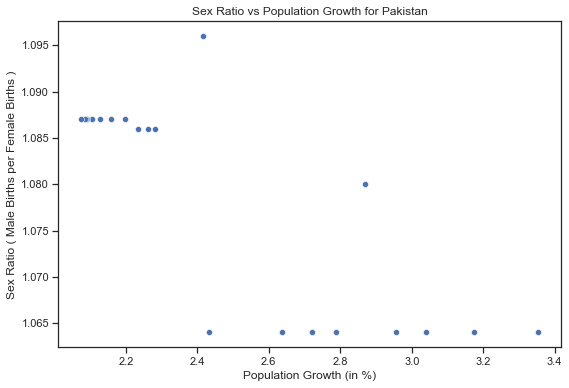

Correlation Coeff:  -0.8106538103906132
P-Value:  0.0000083396


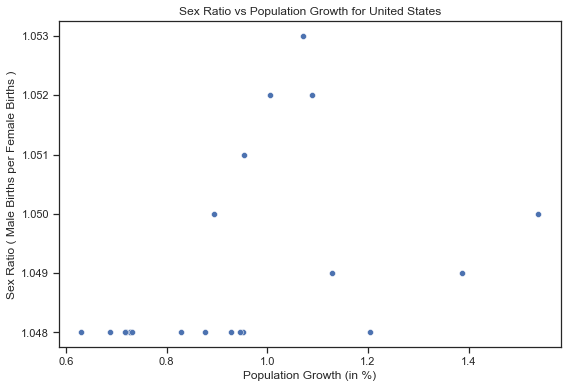

Correlation Coeff:  0.4278230721544639
P-Value:  0.0530307456


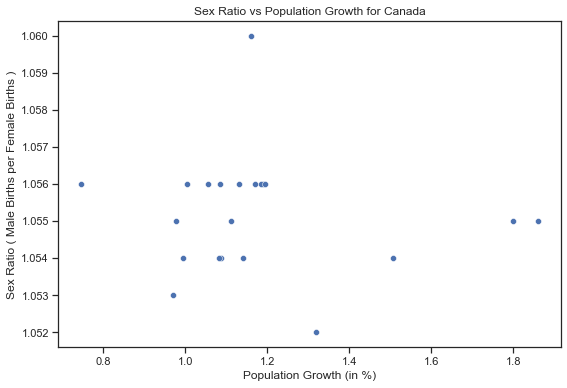

Correlation Coeff:  -0.1031562308797221
P-Value:  0.6563447691


In [393]:
def displayCorrelation(country):
    df = sexRatio.loc[sexRatio['Country Name'] == country].sort_values("Year").copy()
    temp = popGrowth[ (popGrowth["Country Name"] == country) & popGrowth["Year"].isin(indiaRatio["Year"]) ].sort_values("Year")["Population Growth"].copy()
    df["Population Growth"] = temp.values
    df = df.dropna()
    plot = sns.scatterplot(data=df, y="Sex Ratio", x="Population Growth")
    plot.set(xlabel='Population Growth (in %)', ylabel="Sex Ratio ( Male Births per Female Births )", title="Sex Ratio vs Population Growth for " + country)
    plt.show()
    corr, pval = scipystats.pearsonr(df['Population Growth'], df['Sex Ratio'])
    print("Correlation Coeff: ", corr)
    print("P-Value: ", '{:0.10f}'.format(pval))
    
displayCorrelation("India")
displayCorrelation("Pakistan")
displayCorrelation("United States")
displayCorrelation("Canada")

* Seems to be a strong negative correlation between population growth and sex ratio for India and China 
    * As in the higher the population growth for that year, usually comes along with more male births than female
    * Not causation though, as in more population growth = higher ratio
    * Note that these only really the two countries that have faced pressing overpopulation issues and have some polices in place for limiting number of births have this strong correlation
    * Possible that overpopulation issues, along with government limiting births, and possibly rural poverty as well, all contributed to a culture of preferring male children. There're also factors like different already established stigmas associated with gender across countries that could effect this.

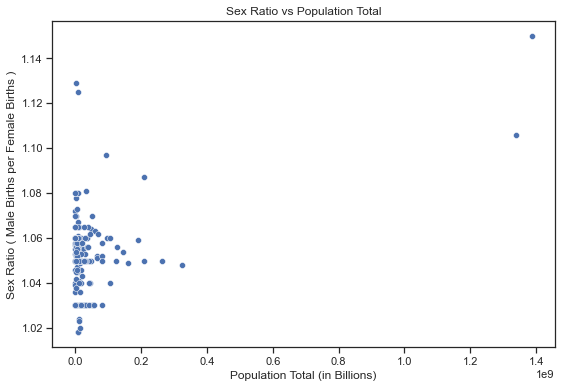

In [435]:
df = popTotal[ popTotal["Year"] == 2017 ].copy()
df = pd.merge(df, sexRatio2017, on='Country Code')
df = df.dropna()

plot = sns.scatterplot(data=df, y="Sex Ratio", x="Population Total")
plot.set(xlabel='Population Total (in Billions)', ylabel="Sex Ratio ( Male Births per Female Births )", title="Sex Ratio vs Population Total")
plt.show()

## Messing with Geopandas

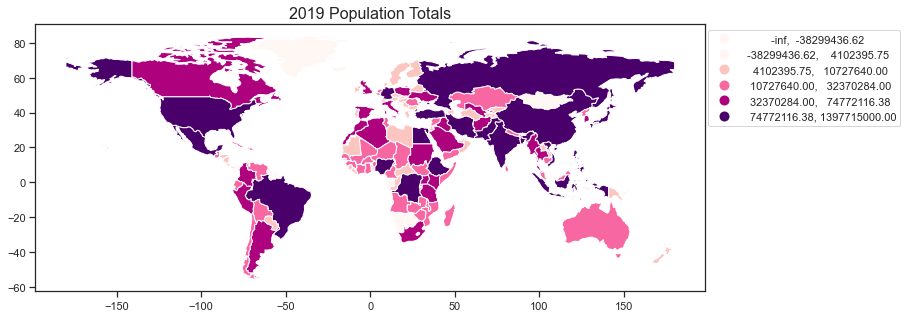

In [433]:
import geopandas
from geopandas import GeoDataFrame

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns=['pop_est', 'continent', 'name', 'Country Code', 'gdp_md_est', 'geometry']
location = pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')

def makeMap(df, columnName, sch ):
    df = pd.merge(df, world, on='Country Code')
    df = df.set_index('Country Name').join(location.set_index('name')) 
    df = GeoDataFrame(df)

    ax = df.plot(column=columnName, 
                scheme=sch,
               figsize=(12, 8),
               legend=True,cmap='RdPu')
    return ax

pop2019 = popTotal[ popTotal["Year"] == 2019 ].copy()
ax = makeMap(pop2019, "Population Total", "boxplot")

plt.title('2019 Population Totals',fontsize=16)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.3,1))
plt.show()

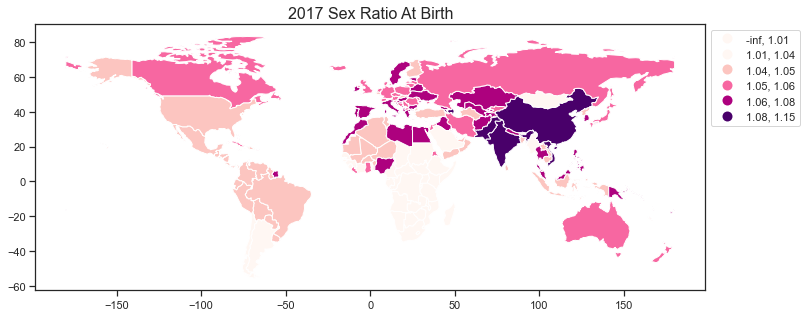

In [434]:
sexRatio2017 = sexRatio[ sexRatio["Year"] == 2017 ].copy()

ax = makeMap(sexRatio2017, "Sex Ratio", "boxplot")
plt.title('2017 Sex Ratio At Birth', fontsize=16)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15,1))
plt.show()


* According to this map plot, since I'm doing it with 'boxplot' 
    * China, India, Pakistan, and like 2 other countries are in the outliers section for sex ratio at birth, past 75 percentile and max 
    * Showing just how out there the ratio is compared to everywhere else

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 20 to 4981
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  193 non-null    object 
 1   Country Code  193 non-null    object 
 2   Year          193 non-null    int64  
 3   Sex Ratio     193 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.5+ KB


<AxesSubplot:>

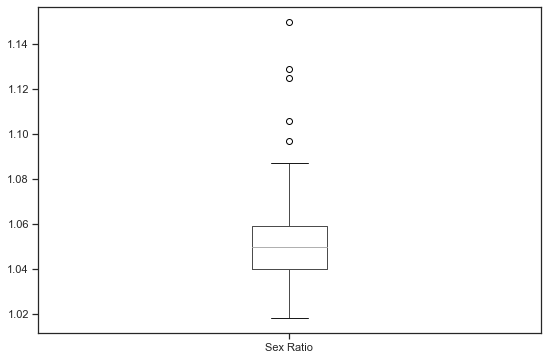

In [424]:
sexRatio2017.info() # across 193 different countries
sexRatio2017.boxplot( column =['Sex Ratio'], grid = False) # yep, it's the highest one right now above 1.14